In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
n_steps = 28 # 순환 신경망으로 28번 입력된다.
n_inputs = 28 # input total. 1 step = 1 input
n_neurons = 150 # totally,
n_outputs = 10 # fully-connected neuron

# learning rate는 학습 속도와 관련있다.
# 지금은 데이터 셋이 적기 때문에 매우 적은 값을 입력했지만, 데이터셋이 많을 경우 적당한 rate가 필요하다.
# learning rate가 너무 적을 경우 학습에 시간이 너무 오래걸릴 수도 있으며, 너무 클 경우 학습이 끝나지 않을 수 있다.
learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons) # Tensorflow에서 제공하는 기본적인 RNN memory cell 구조

#dynamic_rnn()은 필요한 스텝 만큼 자동으로 rnn cell을 거쳐갈 수 있도록 해주는 메서드
#우리가 직접 while loop를 작성할 필요가 없다.
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

# 손실함수로부터 크로스 엔트로피를 계산
logits = tf.layers.dense(states, n_outputs) # is Sigmoid
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

# 시그모이드 함수의 대한 엔트로피를 손실함수 최적화에 적용
# 시그모이드 함수와 실제 데이터의 비교 그래프로부터 두 그래프 간 차이. 즉 크로스 엔트포피를 줄이는 것이 목표
loss = tf.reduce_mean(xentropy)
tf.summary.scalar("loss_function",loss)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

Tensor("rnn/while/Exit_3:0", shape=(?, 150), dtype=float32)


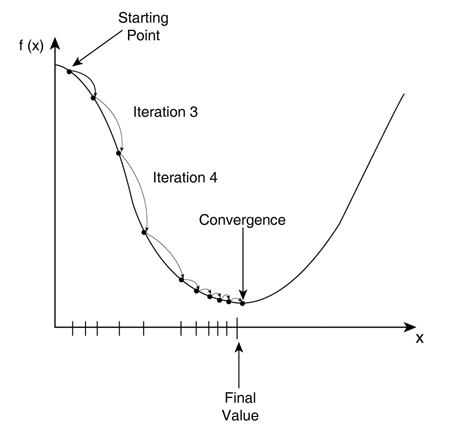
learning rate는 loss function 의 gradient에서 가장 작은 loss 값을 찾는 것이 목표이며, <br>
1) 이때 learning rate가 너무 클 경우 자칫 수렴하는 부분을 못 찾거나, 엉뚱한 loss 값을 가져올 수 있다. <br>
2) 또는 learning rate가 너무 작을 경우 수렴부분을 정밀하게 찾을 수는 있으나, 최적의 loss 값을 찾는 시간이 너무 오래 걸리거나, 또는 못 찾고 종료될 수 있다.

In [5]:
mnist = input_data.read_data_sets("./MNIST_dataset/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting ./MNIST_dataset/train-images-idx3-ubyte.gz
Extracting ./MNIST_dataset/train-labels-idx1-ubyte.gz
Extracting ./MNIST_dataset/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_dataset/t10k-labels-idx1-ubyte.gz


In [ ]:
n_epochs = 40 # 동일한 데이터 셋으로 1천번 반복한다.
batch_size = 150 # 최소 입력 데이터 셋

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            #print(X_batch)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.92 Test accuracy: 0.9312
1 Train accuracy: 0.97333336 Test accuracy: 0.947
2 Train accuracy: 0.9533333 Test accuracy: 0.9516
3 Train accuracy: 0.98 Test accuracy: 0.9599
4 Train accuracy: 0.96 Test accuracy: 0.9663
5 Train accuracy: 0.98 Test accuracy: 0.9624
6 Train accuracy: 0.96666664 Test accuracy: 0.9676
7 Train accuracy: 0.99333334 Test accuracy: 0.9671
